In [1]:
# Name: Ruidi Zhao
# Time: July 2021

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use("ggplot")

# Read Data

In [3]:
# Block level census data, total population
SEX_BY_AGE_TOTAL = pd.read_csv("SEX_BY_AGE_Total.csv")
SEX_BY_AGE_TOTAL.columns = [i.replace("!!Estimate", "") for i in SEX_BY_AGE_TOTAL.columns]
SEX_BY_AGE_TOTAL.head(4)

,Label,"Block Group 1, Census Tract 5077.03, Santa Clara County, California","Block Group 2, Census Tract 5078.05, Santa Clara County, California","Block Group 1, Census Tract 5100.01, Santa Clara County, California","Block Group 2, Census Tract 5100.01, Santa Clara County, California","Block Group 3, Census Tract 5100.01, Santa Clara County, California","Block Group 4, Census Tract 5100.01, Santa Clara County, California","Block Group 5, Census Tract 5100.01, Santa Clara County, California","Block Group 6, Census Tract 5100.01, Santa Clara County, California","Block Group 1, Census Tract 5100.02, Santa Clara County, California",...,"Block Group 3, Census Tract 5102, Santa Clara County, California","Block Group 1, Census Tract 5103, Santa Clara County, California","Block Group 2, Census Tract 5103, Santa Clara County, California","Block Group 3, Census Tract 5103, Santa Clara County, California","Block Group 1, Census Tract 5104, Santa Clara County, California","Block Group 2, Census Tract 5104, Santa Clara County, California","Block Group 3, Census Tract 5104, Santa Clara County, California","Block Group 1, Census Tract 5105, Santa Clara County, California","Block Group 2, Census Tract 5105, Santa Clara County, California","Block Group 3, Census Tract 5105, Santa Clara County, California"
0,Total:,"1,197",991,742,"2,003","1,273",872,940,734,"1,435",...,"1,727","1,379","1,872",995,"2,005",563,"1,137","1,104","1,596","1,841"
1,Male:,494,496,335,868,650,470,402,358,595,...,854,709,879,505,"1,043",292,571,471,765,909
2,Under 5 years,14,72,0,0,47,28,29,0,17,...,57,65,34,0,51,21,32,8,8,58
3,5 to 9 years,14,20,29,0,93,13,0,21,36,...,52,65,54,56,50,20,65,50,82,61


In [4]:
# Block level census data, white population only
SEX_BY_AGE_WHITE = pd.read_csv("SEX_BY_AGE_WHITE_ALONE.csv")
SEX_BY_AGE_WHITE.head(4)

,Label,"Block Group 1, Census Tract 5105, Santa Clara County, California","Block Group 2, Census Tract 5105, Santa Clara County, California","Block Group 3, Census Tract 5105, Santa Clara County, California","Block Group 1, Census Tract 5103, Santa Clara County, California","Block Group 2, Census Tract 5103, Santa Clara County, California","Block Group 3, Census Tract 5103, Santa Clara County, California","Block Group 1, Census Tract 5104, Santa Clara County, California","Block Group 2, Census Tract 5104, Santa Clara County, California","Block Group 3, Census Tract 5104, Santa Clara County, California",...,"Block Group 2, Census Tract 5100.01, Santa Clara County, California","Block Group 3, Census Tract 5100.01, Santa Clara County, California","Block Group 4, Census Tract 5100.01, Santa Clara County, California","Block Group 5, Census Tract 5100.01, Santa Clara County, California","Block Group 6, Census Tract 5100.01, Santa Clara County, California","Block Group 1, Census Tract 5101, Santa Clara County, California","Block Group 2, Census Tract 5101, Santa Clara County, California","Block Group 3, Census Tract 5101, Santa Clara County, California","Block Group 2, Census Tract 5078.05, Santa Clara County, California","Block Group 1, Census Tract 5077.03, Santa Clara County, California"
0,Total:,699,"1,331","1,453","1,082","1,117",801,888,454,735,...,"1,137",758,635,663,471,"1,074",408,628,524,328
1,Male:,328,587,713,544,519,385,450,221,377,...,543,380,286,323,239,517,203,301,251,158
2,Under 5 years,15,10,26,20,27,23,22,14,15,...,27,14,10,8,7,20,10,14,6,4
3,5 to 9 years,31,32,53,35,33,23,28,9,23,...,27,30,18,32,17,37,12,19,11,9


In [5]:
# Mapping: Precinct code >> CBG code
Mapping = pd.read_excel("Voting-Regular-CBG.xlsx", sheet_name="Mapping", usecols="A,C")
Mapping.dropna(inplace=True)
Mapping.head(2)

,Voting Precinct,CBG approx
0,2301.0,"5105.1, 5105.2, 5105.3"
7,2305.0,"5103.1, 5103.2, 5104.1, 5104.2, 5104.3"


In [6]:
Voting_Anna = pd.read_excel("Voting_data.xlsx", sheet_name="Anna")
Voting_Rishi = pd.read_excel("Voting_data.xlsx", sheet_name="Rishi")

# Voting data for Anna
display(Voting_Anna.head(2))

# Voting data for Rishi
display(Voting_Rishi.head(2))

,County,Registered Voters,Election Day,Vote By Mail,Total Votes
0,2301,3636,51,1906,1957
1,2305,4846,103,2603,2706


,County,Election Day,Vote By Mail,Total Votes
0,2301,57,888,945
1,2305,74,1160,1234


# Data Preprocessing

- Transform block level census data into precinct level census data
- Join census and voting data
- Clean data frame (column names, value format)

In [7]:
def clean_CBG_data(CBG_data, white=False):
    """
    Function to clean the dataframe of Census Block Group data
        
    CBG_data: pandas dataframe
    white: if True, input is SEX_BY_AGE_WHITE; else, input is SEX_BY_AGE_TOTAL
    """
    CBG_data = CBG_data.T.reset_index()
    CBG_data.columns = CBG_data.loc[0]
    CBG_data = CBG_data.drop(0).reset_index().drop('index',axis=1)
    cols = list(CBG_data.columns)
    CBG_data.columns = [i.strip().strip(':') for i in cols]
    if not white:
        CBG_data.columns = ['Label', "Total", 'Male'] + ["Male " + i for i in CBG_data.columns[3:26]] + \
                            ["Female"] + ["Female " + i for i in CBG_data.columns[27:]]
    else:
        CBG_data.columns = ['Label', "White Total", 'White Male'] + ["White Male " + i for i in CBG_data.columns[3:26]] + \
                            ["White Female"] + ["White Female " + i for i in CBG_data.columns[27:]]
    return CBG_data

In [8]:
SEX_BY_AGE_TOTAL = clean_CBG_data(SEX_BY_AGE_TOTAL)
SEX_BY_AGE_TOTAL.head(2)

,Label,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,Male 21 years,...,Female 50 to 54 years,Female 55 to 59 years,Female 60 and 61 years,Female 62 to 64 years,Female 65 and 66 years,Female 67 to 69 years,Female 70 to 74 years,Female 75 to 79 years,Female 80 to 84 years,Female 85 years and over
0,"Block Group 1, Census Tract 5077.03, Santa Cla...","1,197",494,14,14,85,10,0,0,0,...,74,16,0,30,0,18,18,28,0,0
1,"Block Group 2, Census Tract 5078.05, Santa Cla...",991,496,72,20,70,0,0,0,0,...,0,75,22,0,0,0,0,34,23,30


In [9]:
SEX_BY_AGE_WHITE = clean_CBG_data(SEX_BY_AGE_WHITE, True)
SEX_BY_AGE_WHITE.head(2)

,Label,White Total,White Male,White Male Under 5 years,White Male 5 to 9 years,White Male 10 to 14 years,White Male 15 to 17 years,White Male 18 and 19 years,White Male 20 years,White Male 21 years,...,White Female 50 to 54 years,White Female 55 to 59 years,White Female 60 and 61 years,White Female 62 to 64 years,White Female 65 and 66 years,White Female 67 to 69 years,White Female 70 to 74 years,White Female 75 to 79 years,White Female 80 to 84 years,White Female 85 years and over
0,"Block Group 1, Census Tract 5105, Santa Clara ...",699,328,15,31,30,7,1,2,1,...,33,16,11,9,11,12,16,10,17,12
1,"Block Group 2, Census Tract 5105, Santa Clara ...","1,331",587,10,32,51,35,12,4,2,...,54,38,23,36,18,19,28,23,64,177


In [10]:
# Combine SEX_BY_AGE_TOTAL and SEX_BY_AGE_WHITE
CBG_data = SEX_BY_AGE_TOTAL.merge(SEX_BY_AGE_WHITE, on = "Label")
CBG_data = CBG_data.astype(str)
CBG_data.head(2)

,Label,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,Male 21 years,...,White Female 50 to 54 years,White Female 55 to 59 years,White Female 60 and 61 years,White Female 62 to 64 years,White Female 65 and 66 years,White Female 67 to 69 years,White Female 70 to 74 years,White Female 75 to 79 years,White Female 80 to 84 years,White Female 85 years and over
0,"Block Group 1, Census Tract 5077.03, Santa Cla...","1,197",494,14,14,85,10,0,0,0,...,12,19,9,9,8,5,9,8,3,5
1,"Block Group 2, Census Tract 5078.05, Santa Cla...",991,496,72,20,70,0,0,0,0,...,15,33,4,16,4,9,5,16,14,12


In [11]:
# Transform block level census data into precinct level data
df = [] 
for ind in list(Mapping.index): 
    
    # Precinct Number
    precinct = Mapping.loc[ind, "Voting Precinct"]
    
    # Raw CBG number
    CBG = (Mapping.loc[ind, "CBG approx"]).split(', ')
    census = np.zeros(shape=(98,))
    
    # Find tract and block number, then aggregate the census data (total and white)
    for group in CBG:
        
        # Get the multipler for each district to correct the population
        multipler = 1
        if 'half' in group:
            multipler = 0.5
            group = group[:-4]
        elif 'ratio_2' in group:  
            multipler =  43/795 # total registered voters/total 18+ years old population
            group = group[:-7]
            #print(group)
        elif 'ratio_1' in group: 
            multipler =  167/742
            group = group[:-7]
        
        # Extract the tract number and block number 
        if len(group) == 6:
            tract = group[:4]
            block = group[-1]
        else:
            tract = group[:7]
            block = group[-1]
        
        label = "Block Group {}, Census Tract {}, Santa Clara County, California".format(block, tract)
        this_block = CBG_data[CBG_data['Label'] == label]
        this_block_value = list(this_block.values[0, 1:])
        this_block_value = np.array([float(i.replace(',', '')) for i in this_block_value]) * multipler
        census += this_block_value
        
    to_add = [precinct, CBG] + list(census)
    df.append(to_add)
        
df = pd.DataFrame(df, columns=["Precinct", "CBG"] + list(CBG_data.columns)[1:])
df['Precinct'] = df['Precinct'].astype('int64')
df

,Precinct,CBG,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,...,White Female 50 to 54 years,White Female 55 to 59 years,White Female 60 and 61 years,White Female 62 to 64 years,White Female 65 and 66 years,White Female 67 to 69 years,White Female 70 to 74 years,White Female 75 to 79 years,White Female 80 to 84 years,White Female 85 years and over
0,2301,"[5105.1, 5105.2, 5105.3]",4541.000000,2145.000000,74.000000,193.000000,187.000000,98.000000,55.0,9.0,...,152.000000,123.000000,56.000000,94.000000,57.000000,51.000000,89.000000,75.000000,125.000000,233.000000
1,2305,"[5103.1, 5103.2, 5104.1, 5104.2, 5104.3]",6956.000000,3494.000000,203.000000,254.000000,294.000000,201.000000,34.0,30.0,...,209.000000,194.000000,65.000000,99.000000,54.000000,87.000000,100.000000,102.000000,76.000000,115.000000
2,2309,"[5102.3half, 5103.3]",1858.500000,932.000000,28.500000,82.000000,107.000000,79.500000,13.5,0.0,...,63.500000,51.500000,17.000000,43.000000,22.000000,32.500000,47.000000,36.500000,27.000000,32.000000
3,2314,"[5102.1, 5102.2, 5102.3half]",3760.500000,1802.000000,90.500000,134.000000,149.000000,79.500000,16.5,52.0,...,117.500000,107.500000,34.000000,59.000000,32.000000,44.500000,55.000000,37.500000,40.000000,53.000000
4,2317,"[5100.02.1, 5100.02.2, 5100.02.3]",3616.000000,1581.000000,47.000000,84.000000,144.000000,107.000000,6.0,0.0,...,127.000000,93.000000,31.000000,48.000000,41.000000,50.000000,44.000000,47.000000,52.000000,45.000000
5,2330,"[5100.01.1, 5100.01.2, 5100.01.3, 5100.01.4, 5...",6564.000000,3083.000000,104.000000,156.000000,245.000000,183.000000,14.0,23.0,...,212.000000,163.000000,67.000000,88.000000,59.000000,77.000000,86.000000,99.000000,93.000000,132.000000
6,2338,[5078.05.2ratio_1],223.041779,111.633423,16.204852,4.501348,15.754717,0.000000,0.0,0.0,...,3.376011,7.427224,0.900270,3.601078,0.900270,2.025606,1.125337,3.601078,3.150943,2.700809
7,2351,"[5101.1, 5101.2, 5101.3]",2906.000000,1493.000000,90.000000,181.000000,133.000000,47.000000,16.0,14.0,...,99.000000,79.000000,40.000000,41.000000,32.000000,53.000000,61.000000,63.000000,59.000000,43.000000
8,2353,[5077.03.1ratio_2],64.743396,26.719497,0.757233,0.757233,4.597484,0.540881,0.0,0.0,...,0.649057,1.027673,0.486792,0.486792,0.432704,0.270440,0.486792,0.432704,0.162264,0.270440


In [12]:
# Join Voting and Census Data
Voting_Anna.columns = ['Precinct', 'Registered Voters'] + [i+"_Anna" for i in Voting_Anna.columns[2:]]
Voting_Rishi.columns = ['Precinct'] + [i+"_Rishi" for i in Voting_Rishi.columns[1:]]
df = (df.merge(Voting_Anna, on="Precinct")).merge(Voting_Rishi, on="Precinct")
df

,Precinct,CBG,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,...,White Female 75 to 79 years,White Female 80 to 84 years,White Female 85 years and over,Registered Voters,Election Day_Anna,Vote By Mail_Anna,Total Votes_Anna,Election Day_Rishi,Vote By Mail_Rishi,Total Votes_Rishi
0,2301,"[5105.1, 5105.2, 5105.3]",4541.000000,2145.000000,74.000000,193.000000,187.000000,98.000000,55.0,9.0,...,75.000000,125.000000,233.000000,3636,51,1906,1957,57,888,945
1,2305,"[5103.1, 5103.2, 5104.1, 5104.2, 5104.3]",6956.000000,3494.000000,203.000000,254.000000,294.000000,201.000000,34.0,30.0,...,102.000000,76.000000,115.000000,4846,103,2603,2706,74,1160,1234
2,2309,"[5102.3half, 5103.3]",1858.500000,932.000000,28.500000,82.000000,107.000000,79.500000,13.5,0.0,...,36.500000,27.000000,32.000000,1231,11,665,676,27,305,332
3,2314,"[5102.1, 5102.2, 5102.3half]",3760.500000,1802.000000,90.500000,134.000000,149.000000,79.500000,16.5,52.0,...,37.500000,40.000000,53.000000,2828,49,1432,1481,49,802,851
4,2317,"[5100.02.1, 5100.02.2, 5100.02.3]",3616.000000,1581.000000,47.000000,84.000000,144.000000,107.000000,6.0,0.0,...,47.000000,52.000000,45.000000,2707,69,1387,1456,32,706,738
5,2330,"[5100.01.1, 5100.01.2, 5100.01.3, 5100.01.4, 5...",6564.000000,3083.000000,104.000000,156.000000,245.000000,183.000000,14.0,23.0,...,99.000000,93.000000,132.000000,4245,57,2227,2284,53,1176,1229
6,2338,[5078.05.2ratio_1],223.041779,111.633423,16.204852,4.501348,15.754717,0.000000,0.0,0.0,...,3.601078,3.150943,2.700809,167,4,69,73,1,49,50
7,2351,"[5101.1, 5101.2, 5101.3]",2906.000000,1493.000000,90.000000,181.000000,133.000000,47.000000,16.0,14.0,...,63.000000,59.000000,43.000000,2398,40,1242,1282,33,665,698
8,2353,[5077.03.1ratio_2],64.743396,26.719497,0.757233,0.757233,4.597484,0.540881,0.0,0.0,...,0.432704,0.162264,0.270440,43,2,12,14,4,11,15


# Exploratory Data Analysis

- Voting Data:
    - [Total Votes](#Total-Votes-by-Precinct)
    - [Mail Votes](#Percent-of-Mail-Votes)
- Census Data:
    - Total Population
        - [Total Population by Precinct](#Total-Population-by-Precinct)
        - [18+ Population by Precinct](#Age-18+-population-by-Precinct)
    - Sex
        - [Total Population by Precinct and Gender](#Total-population-by-Precinct-and-Gender)
        - [18+ Population by Precinct and Gender](#Age-18+-population-by-Precint-and-Gender)
        - [18+ Percent by Precinct and Gender(18+/Total)](#Male,-Female-Precent-above-18-years-by-Precinct-(18+/Total)
)
    - Age 
       - [Age Distribution by Precinct](#Age-Group-by-Precinct)
    - Race(white)
       - [White population percent by Precinct](#White-population-percent-by-Precinct)
       - [White 18+ Percent by Precinct(18+ White/Total White)](#White-18+/Total-18+-by-Precinct-(Total,-Male,-Female))
       

### Total Votes by Precinct

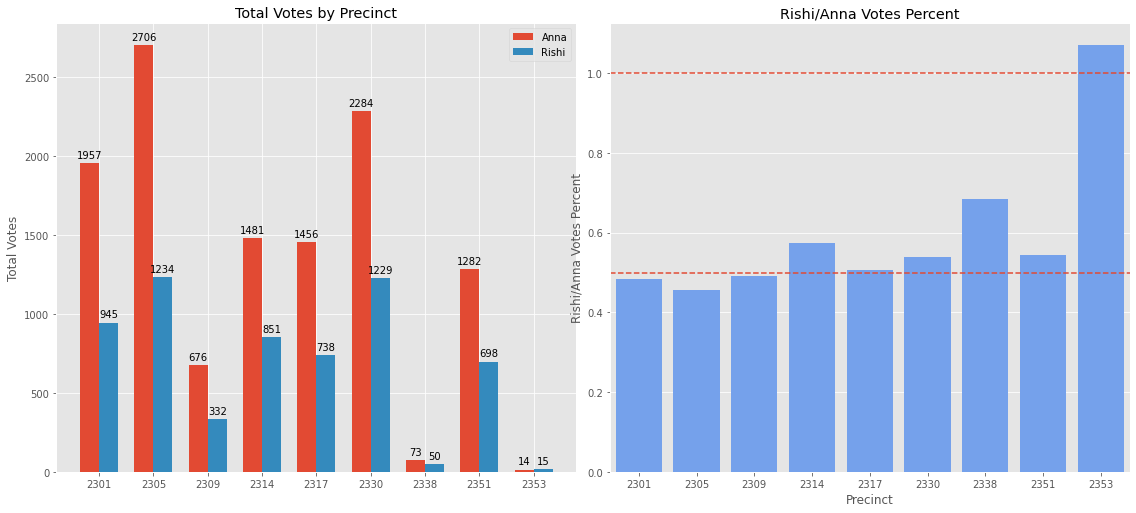

In [13]:
labels = list(df['Precinct'])
Anna = df['Total Votes_Anna']
Rishi = df['Total Votes_Rishi']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(16,7))
rects1 = ax[0].bar(x - width/2, Anna, width, label='Anna')
rects2 = ax[0].bar(x + width/2, Rishi, width, label='Rishi')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Total Votes')
ax[0].set_title('Total Votes by Precinct')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)
fig.tight_layout()


df['Rishi/Anna Votes Percent'] = df['Total Votes_Rishi']/df['Total Votes_Anna']
sns.barplot(data=df, y="Rishi/Anna Votes Percent",x="Precinct",ax=ax[1], color="#619CFF")
ax[1].axhline(0.5, ls="--")
ax[1].axhline(1., ls="--")
ax[1].set_title("Rishi/Anna Votes Percent");

### Percent of Mail Votes

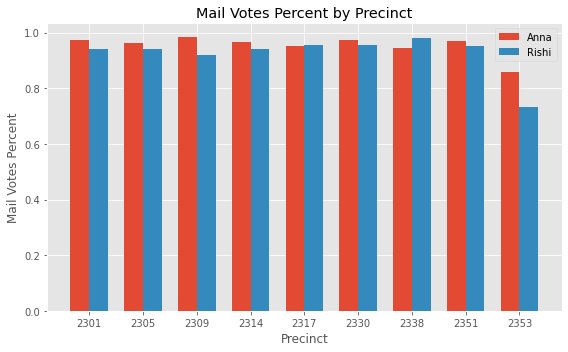

In [14]:
df['Mail Vote Percent_Anna'] = df['Vote By Mail_Anna']/df['Total Votes_Anna']
df['Mail Vote Percent_Rishi'] = df['Vote By Mail_Rishi']/df['Total Votes_Rishi']

labels = list(df['Precinct'])
Anna = df['Mail Vote Percent_Anna']
Rishi = df['Mail Vote Percent_Rishi']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, Anna, width, label='Anna')
rects2 = ax.bar(x + width/2, Rishi, width, label='Rishi')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mail Votes Percent')
ax.set_title('Mail Votes Percent by Precinct')
ax.set_xlabel("Precinct")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()

### Total Population by Precinct

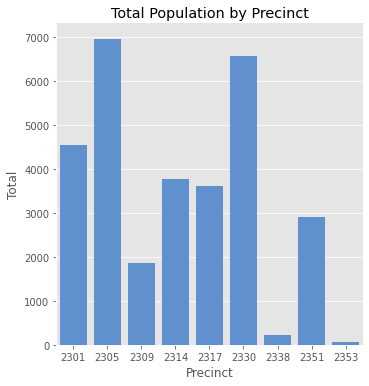

In [53]:
sns.catplot(x="Precinct", y="Total", kind="bar", data=df, color="#4E8FE0")
plt.title("Total Population by Precinct");

- 2305, 2330 have the largest population
- 2338, 2353 have the smallest population

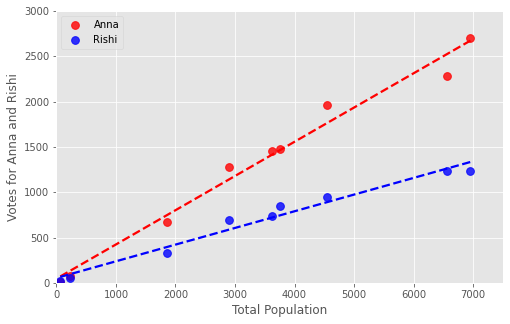

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Total", y="Total Votes_Anna",data=df, ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"red"}, line_kws={"color":"red", "ls":"--"}, 
            label="Anna")
sns.regplot(x="Total", y="Total Votes_Rishi", data=df, ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"blue"}, line_kws={"color":"blue", "ls":"--"}, 
            label="Rishi")

ax.set(xlabel="Total Population", ylabel="Votes for Anna and Rishi", ylim=(0, 3000), 
           xlim=(0, 7500))
plt.legend();
# ax.set(xlabel="Total Population", ylabel="Votes for Rishi", ylim=(0, 3000));

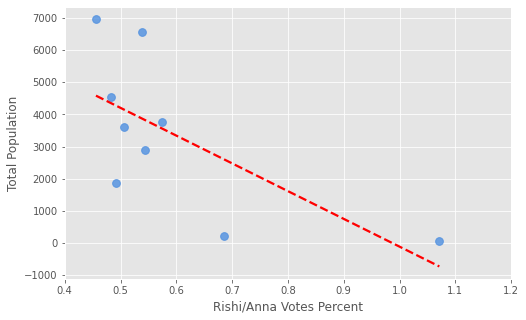

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Total",data=df, ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"#4E8FE0"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2), ylabel="Total Population");

### Total population by Precinct and Gender

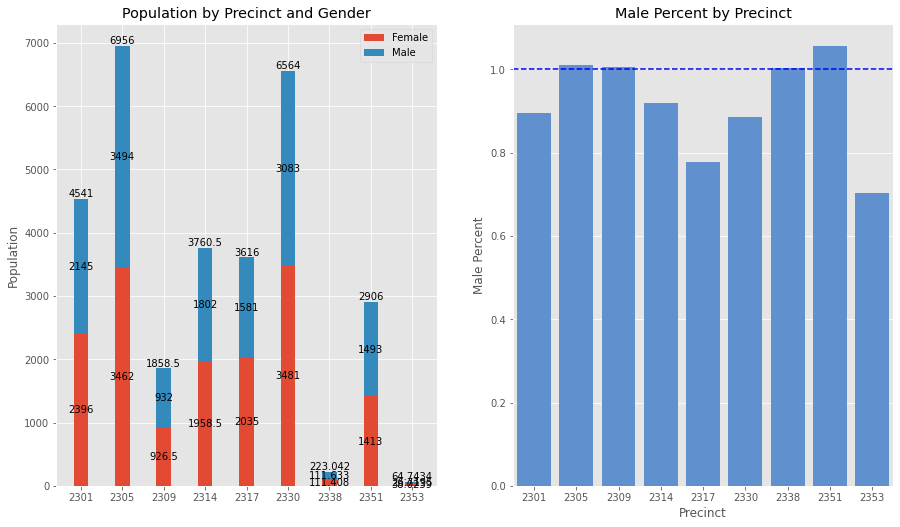

In [18]:
N = 9
men = df['Male']
women = df['Female']
labels = list(df['Precinct'])
ind = np.arange(N)    
width = 0.35 

fig, ax = plt.subplots(1, 2, figsize=(15,8.5))

p1 = ax[0].bar(ind, women, width, label='Female') 
p2 = ax[0].bar(ind, men, width, bottom=women, label='Male')

ax[0].set_ylabel('Population')
ax[0].set_title('Population by Precinct and Gender')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Label with label_type 'center' instead of the default 'edge'
ax[0].bar_label(p1, label_type='center')
ax[0].bar_label(p2, label_type='center')
ax[0].bar_label(p2)


df['Male Percent'] = df['Male']/df['Female']
p3 = sns.barplot(x="Precinct", y="Male Percent", data=df, ax=ax[1], color="#4E8FE0")
ax[1].axhline(1.0, ls='--', color="blue")
ax[1].set_title("Male Percent by Precinct");

- 2305, 2309, 2338 have roughly balanced population
- 2351 has more male population
- 2301, 2314, 2317, 2330, 2353 have more female population

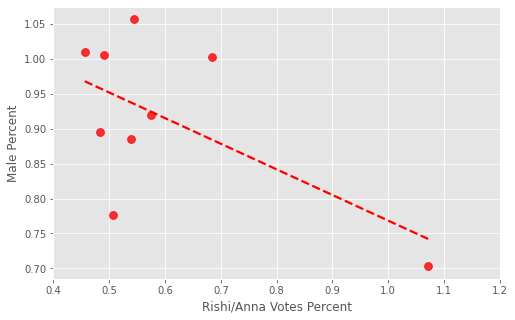

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Male Percent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

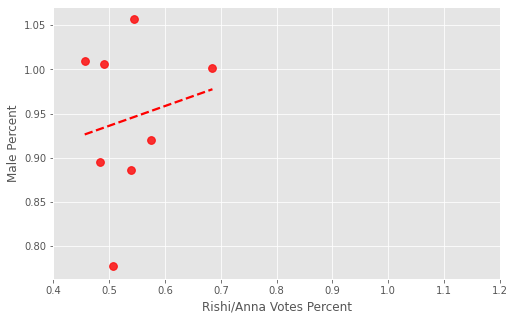

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Male Percent",data=df.loc[:7, :], ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

### Age 18+ population by Precinct

In [21]:
cols = list(df.columns)
male_18_index = cols.index("Male 18 and 19 years")
female_index = cols.index("Female")
female_18_index = cols.index("Female 18 and 19 years")
female_end_index = cols.index("Female 85 years and over")

df['Male Above 18 years'] = (df[df.columns[male_18_index:female_index]]).sum(axis=1).values
df['Female Above 18 years'] = (df[df.columns[female_18_index:female_end_index+1]]).sum(axis=1).values
df['Above 18 years'] = df['Male Above 18 years'] + df['Female Above 18 years']
df['Male Above 18 years percent'] = df['Male Above 18 years']/df['Male']
df['Female Above 18 years percent'] = df['Female Above 18 years']/df['Female']
df['Above 18 years percent'] = df['Above 18 years']/df['Total']

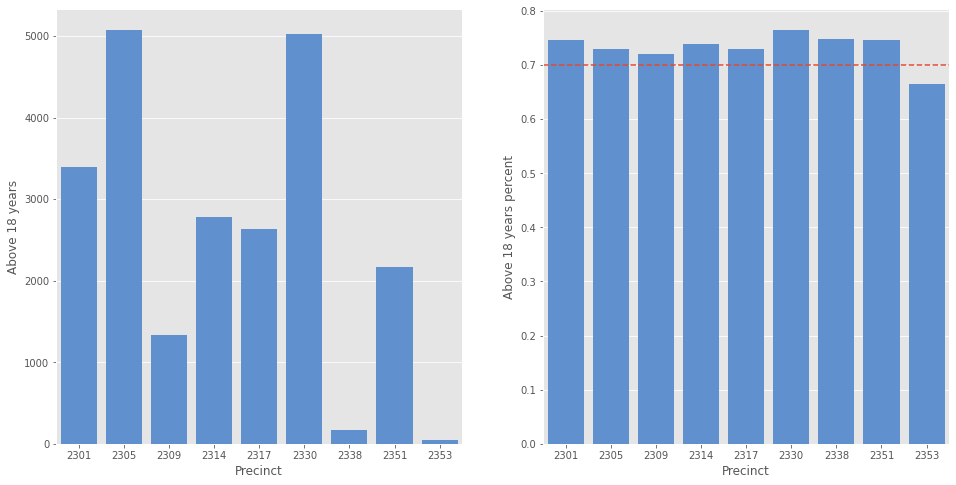

In [22]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.barplot(x="Precinct", y="Above 18 years", data=df, ax=ax[0], color="#4E8FE0")
sns.barplot(x="Precinct", y="Above 18 years percent", data=df, ax=ax[1], color="#4E8FE0")
ax[1].axhline(0.7, ls="--");

In [47]:
np.corrcoef(df['Total'], df['Above 18 years'])

array([[1.        , 0.99937555],
       [0.99937555, 1.        ]])

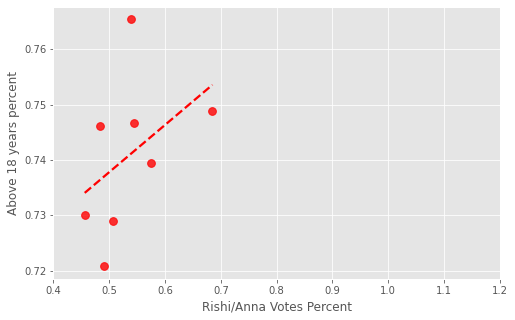

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Above 18 years percent",data=df.loc[:7], ax=ax, ci=False, 
            scatter_kws={"s":60, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

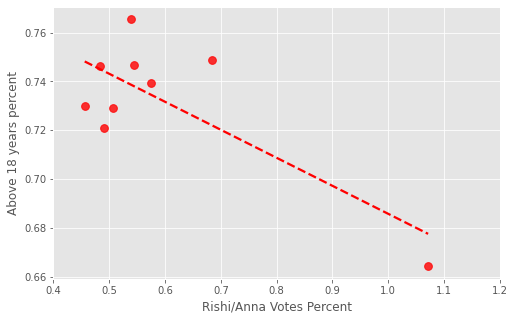

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Above 18 years percent",data=df, ax=ax, 
            ci=False, scatter_kws={"s":60, 'color':"red"}, 
                line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

### Registered Voters by Precinct

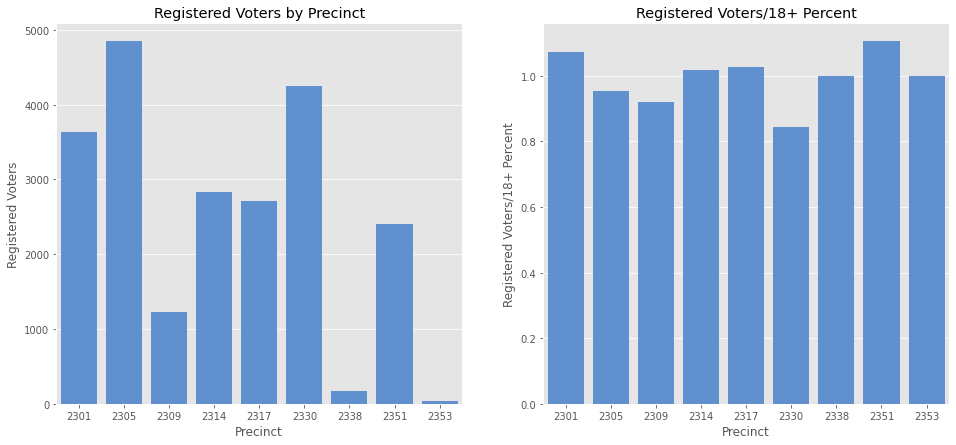

In [56]:
fig, ax = plt.subplots(1,2, figsize=(16, 7))
sns.barplot(x="Precinct", y="Registered Voters", data=df, color="#4E8FE0", ax=ax[0])
ax[0].set_title("Registered Voters by Precinct")

df['Registered Voters/18+ Percent'] = df['Registered Voters']/df['Above 18 years']
sns.barplot(x="Precinct", y = "Registered Voters/18+ Percent", data=df, color="#4E8FE0", ax=ax[1])
ax[1].set_title("Registered Voters/18+ Percent");

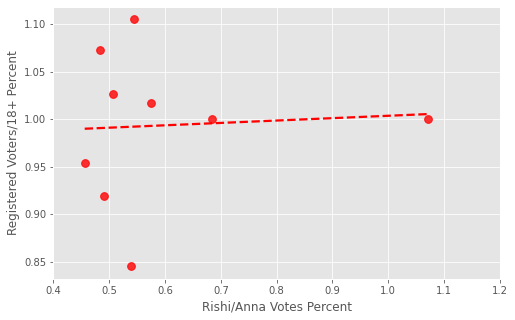

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Registered Voters/18+ Percent",data=df, ax=ax, 
            ci=False, scatter_kws={"s":60, 'color':"red"}, 
                line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

In [63]:
(df[['Total', "Above 18 years", "Registered Voters"]]).corr()

,Total,Above 18 years,Registered Voters
Total,1.000000,0.999376,0.989851
Above 18 years,0.999376,1.000000,0.987532
Registered Voters,0.989851,0.987532,1.000000


### Age 18+ population by Precinct and Gender

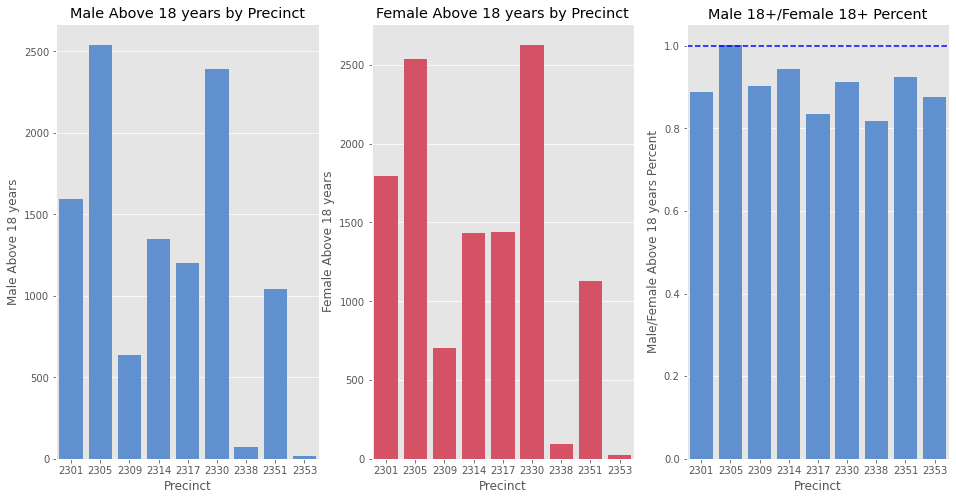

In [85]:
# Male, Female above 18 years by Precinct
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.barplot(x="Precinct", y="Male Above 18 years", data=df, color="#4E8FE0", ax=ax[0]);
ax[0].set_title("Male Above 18 years by Precinct")
sns.barplot(x="Precinct", y="Female Above 18 years", data=df, color="#EB3B57", ax=ax[1])
ax[1].set_title("Female Above 18 years by Precinct")
df['Male/Female Above 18 years Percent'] = df['Male Above 18 years']/df['Female Above 18 years']
sns.barplot(x="Precinct", y="Male/Female Above 18 years Percent", data=df, color="#4E8FE0", ax=ax[2])
ax[2].axhline(1.0, ls='--', color="blue")
ax[2].set_title("Male 18+/Female 18+ Percent");

Except 2305, all the precincts have more female 18+ than male.

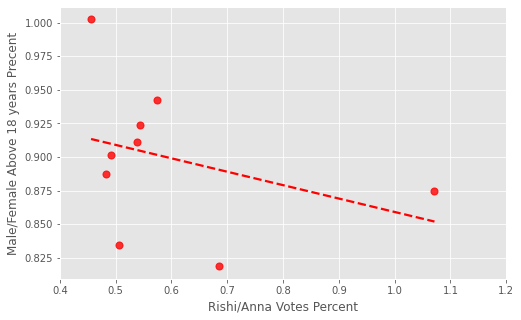

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Male/Female Above 18 years Precent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

In [81]:
df[["Male Percent", "Male/Female Above 18 years Precent"]].corr()

,Male Percent,Male/Female Above 18 years Precent
Male Percent,1.000000,0.394637
Male/Female Above 18 years Precent,0.394637,1.000000


### Male, Female Precent above 18 years by Precinct (18+/Total)

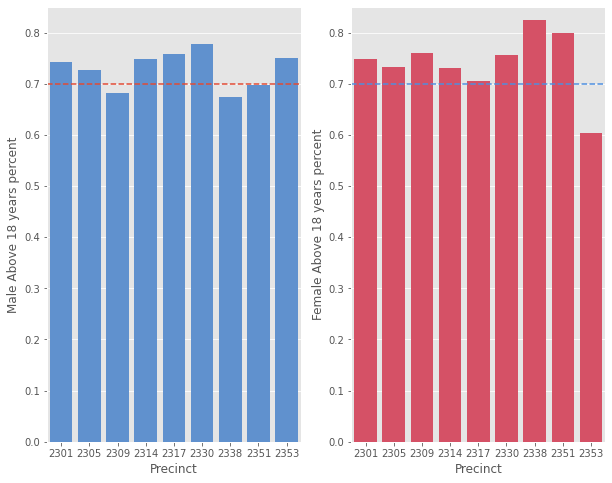

In [28]:
# Male, Female Precent above 18 years by Precinct
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.barplot(x="Precinct", y="Male Above 18 years percent", data=df, color="#4E8FE0", ax=ax[0]);
sns.barplot(x="Precinct", y="Female Above 18 years percent", data=df, color="#EB3B57", ax=ax[1]);

ax[0].axhline(0.7, ls='--')
ax[0].set(ylim=(0, 0.85))
ax[1].axhline(0.7, ls='--', color="#4E8FE0")
ax[1].set(ylim=(0, 0.85));

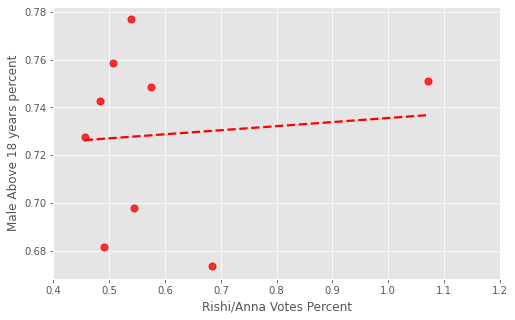

In [29]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Male Above 18 years percent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

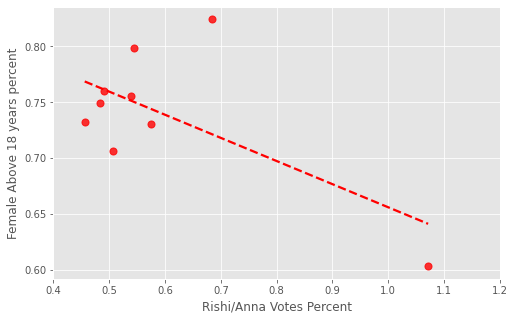

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="Female Above 18 years percent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

### Age Group by population

In [31]:
# Split age into groups, https://www.beresfordresearch.com/age-range-by-generation/
# Below 18 years
# 18 - 24
# 25 - 39
# 40 - 54
# 55 - 74
# 75 + 
age_split = {18:'18 and 19 years', 24:'22 to 24 years', 39:'35 to 39 years', 54:'50 to 54 years', 
                 74:"70 to 74 years", 85:"85 years and over"}
cols = list(df.columns)
for i in ['Male', 'Female']:
    split_1 = cols.index(i)
    split_2 = cols.index(i + " " + age_split[18])
    split_3 = cols.index(i + " " + age_split[24])
    split_4 = cols.index(i + " " + age_split[39])
    split_5 = cols.index(i + " " + age_split[54])
    split_6 = cols.index(i + " " + age_split[74])
    split_7 = cols.index(i + " " + age_split[85])
    
    df[i + " " + "Below 18 years"] = df[cols[split_1+1:split_2]].sum(axis=1).values
    df[i + " " + "18 to 24 years"] = df[cols[split_2:split_3+1]].sum(axis=1).values
    df[i + " " + "25 to 39 years"] = df[cols[split_3+1:split_4+1]].sum(axis=1).values
    df[i + " " + "40 to 54 years"] = df[cols[split_4+1:split_5+1]].sum(axis=1).values
    df[i + " " + "55 to 74 years"] = df[cols[split_5+1:split_6+1]].sum(axis=1).values
    df[i + " " + "Above 75 years"] = df[cols[split_6+1:split_7+1]].sum(axis=1).values

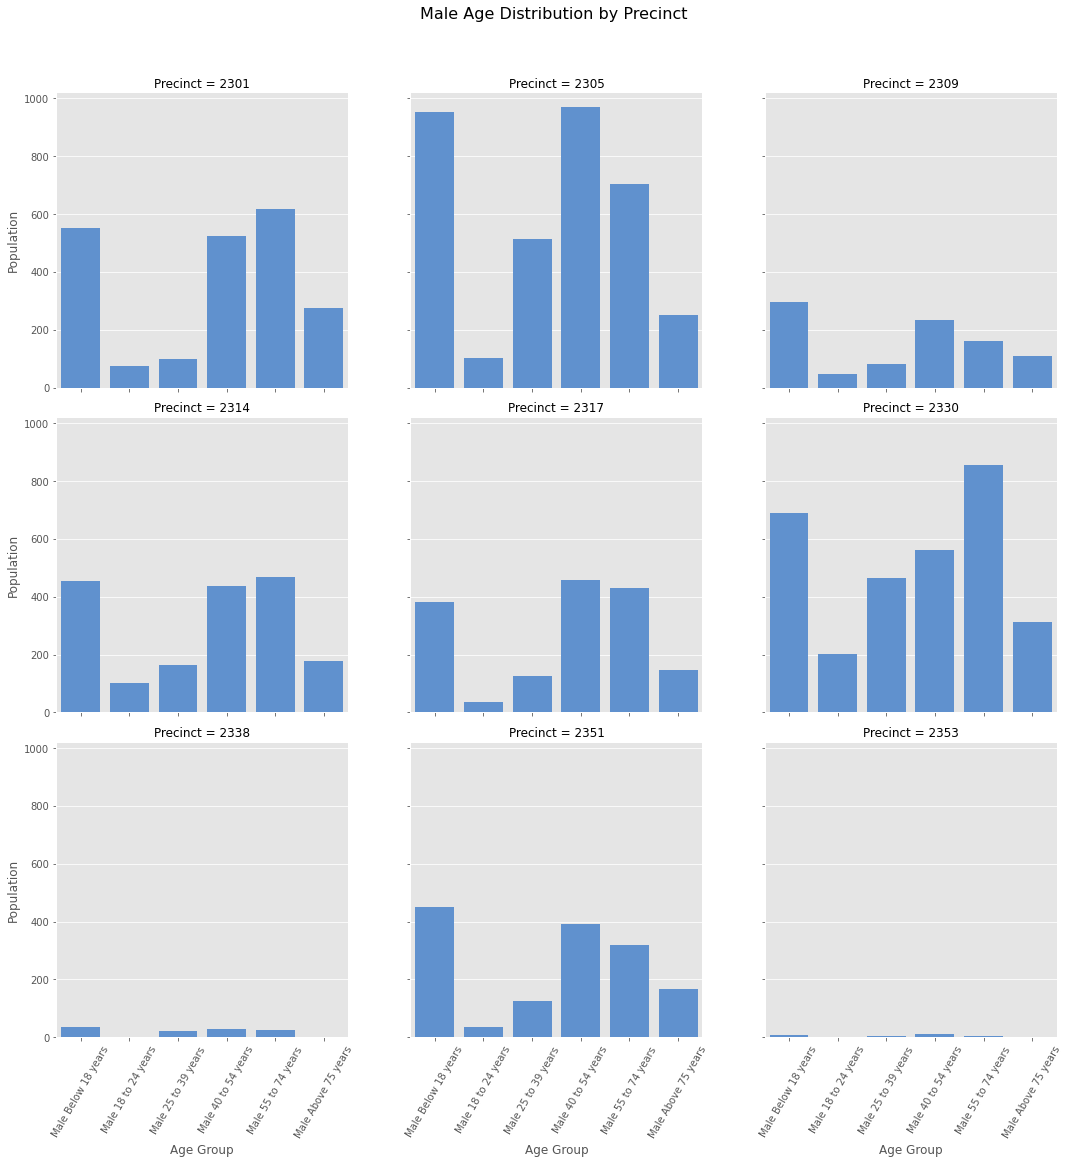

In [32]:
male_age_group_df = df[["Precinct", 'Male Below 18 years', 'Male 18 to 24 years', 'Male 25 to 39 years',
       'Male 40 to 54 years', 'Male 55 to 74 years', 'Male Above 75 years']]

reshape = pd.melt(male_age_group_df, id_vars = "Precinct", value_vars = ['Male Below 18 years', 'Male 18 to 24 years', 'Male 25 to 39 years',
       'Male 40 to 54 years', 'Male 55 to 74 years', 'Male Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#4E8FE0")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Male Age Distribution by Precinct', fontsize=16);

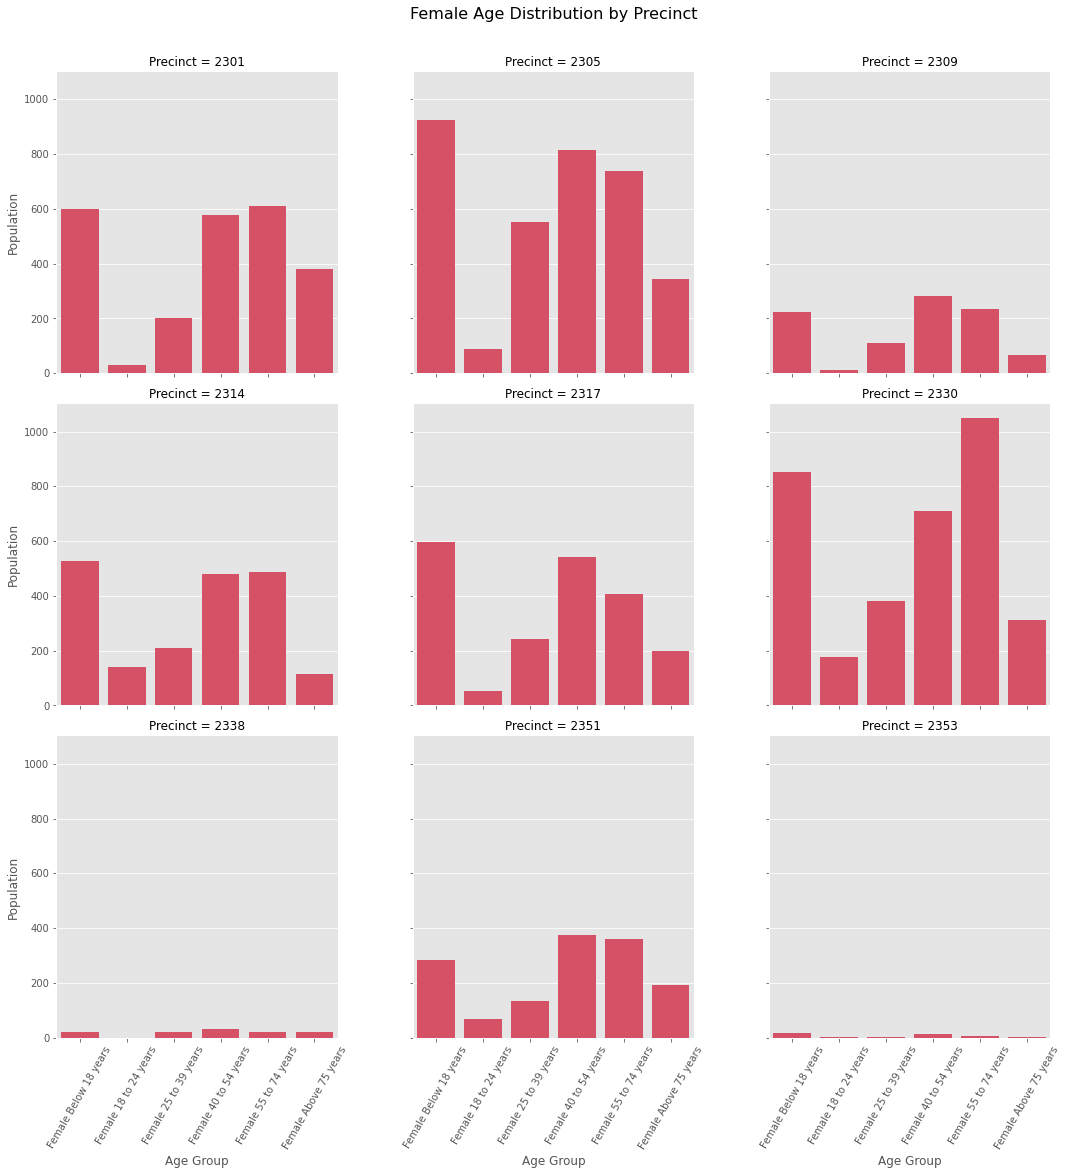

In [33]:
Female_age_group_df = df[["Precinct", 'Female Below 18 years', 'Female 18 to 24 years', 'Female 25 to 39 years',
       'Female 40 to 54 years', 'Female 55 to 74 years', 'Female Above 75 years']]

reshape = pd.melt(Female_age_group_df, id_vars = "Precinct", value_vars = ['Female Below 18 years', 'Female 18 to 24 years', 'Female 25 to 39 years',
       'Female 40 to 54 years', 'Female 55 to 74 years', 'Female Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#EB3B57")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Female Age Distribution by Precinct', fontsize=16);

In [34]:
for i in ['Below 18 years', '18 to 24 years', '25 to 39 years',
       '40 to 54 years', '55 to 74 years', 'Above 75 years']:
    male_col = "Male " + i
    female_col = "Female " + i
    df["Total " + i] = df[male_col] + df[female_col]

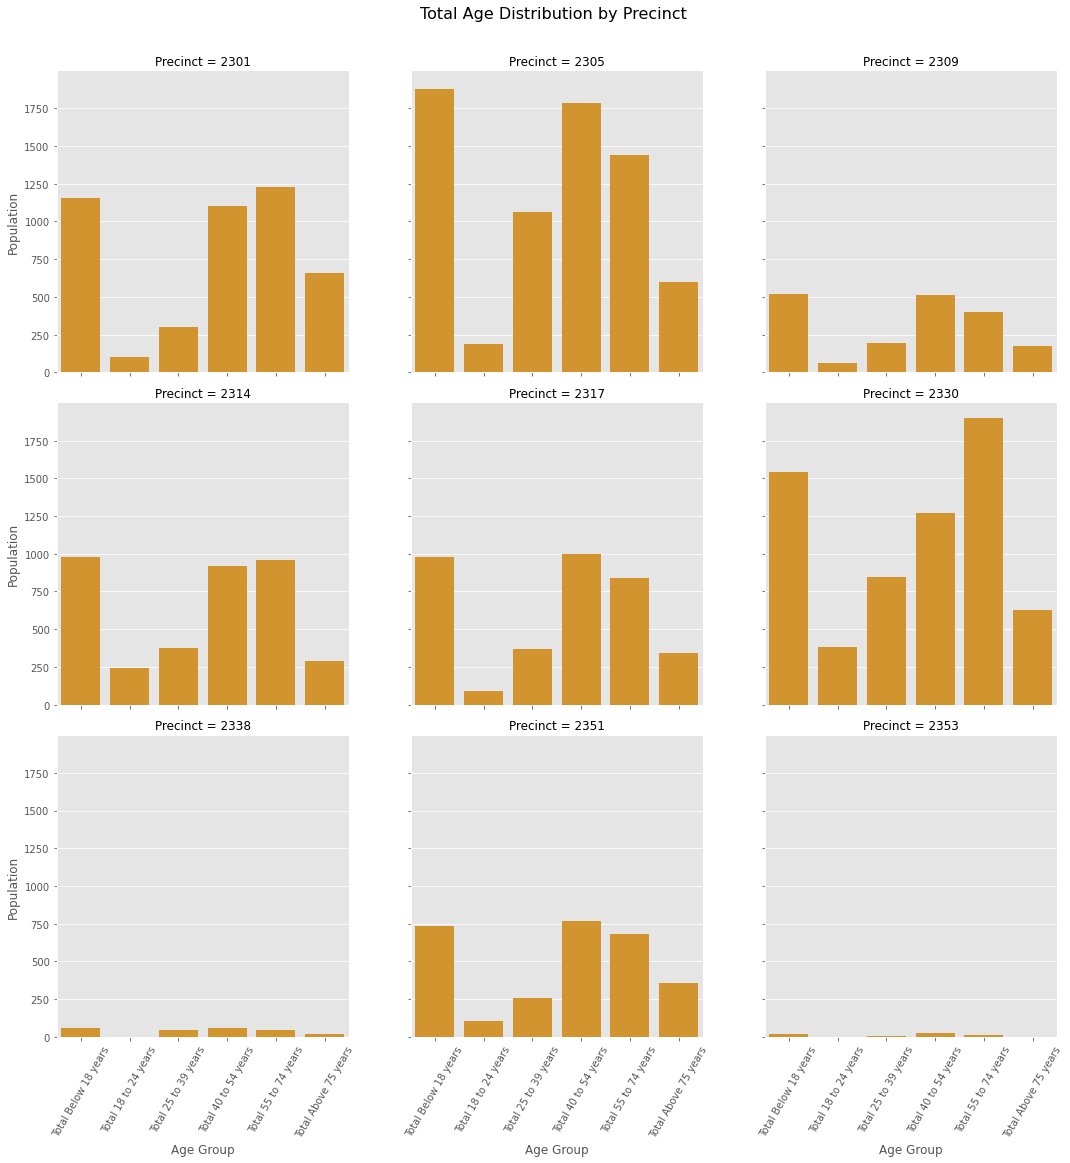

In [35]:
Total_age_group_df = df[["Precinct", 'Total Below 18 years', 'Total 18 to 24 years', 'Total 25 to 39 years',
       'Total 40 to 54 years', 'Total 55 to 74 years', 'Total Above 75 years']]

reshape = pd.melt(Total_age_group_df, id_vars = "Precinct", value_vars = ['Total Below 18 years', 'Total 18 to 24 years', 'Total 25 to 39 years',
       'Total 40 to 54 years', 'Total 55 to 74 years', 'Total Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#ED9A14")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Total Age Distribution by Precinct', fontsize=16);

### Registered Voters/18+ population

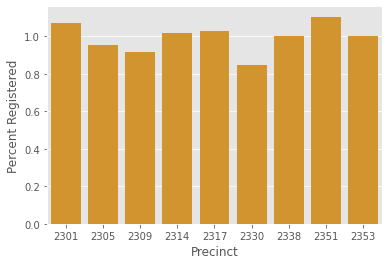

In [36]:
# Registered Voters/18+year old
df['Percent Registered'] = df['Registered Voters']/df['Above 18 years']
fig, ax=plt.subplots()
sns.barplot(x='Precinct', y='Percent Registered', data=df, color="#ED9A14");

### White population percent by Precinct

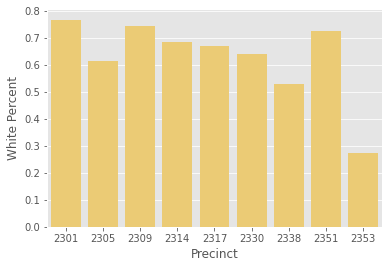

In [37]:
df['White Percent'] = df['White Total']/df['Total']
fig, ax = plt.subplots()
sns.barplot(x="Precinct", y="White Percent", data=df, ax=ax, color="#FFD461");

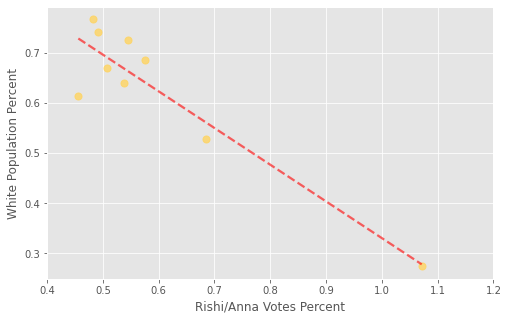

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="White Percent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"#FFD461"}, line_kws={"color":"red", "ls":"--", 
                                                               "alpha":0.6})
ax.set(xlim=(0.4, 1.2), ylabel="White Population Percent");

### White 18+/Total 18+ by Precinct (Total, Male, Female)

In [40]:
cols = list(df.columns)
white_male_18_index = cols.index("White Male 18 and 19 years")
white_female_index = cols.index("White Female")
white_female_18_index = cols.index("White Female 18 and 19 years")
white_female_end_index = cols.index("White Female 85 years and over")

df['White Male Above 18 years'] = (df[cols[white_male_18_index:white_female_index]]).sum(axis=1).values
df['White Female Above 18 years'] = (df[cols[white_female_18_index:white_female_end_index+1]]).sum( \
                                                axis=1).values
df['White Above 18 years'] = df['White Male Above 18 years'] + df['White Female Above 18 years']
df['White Above 18 years Percent'] = df['White Above 18 years']/df['Above 18 years']

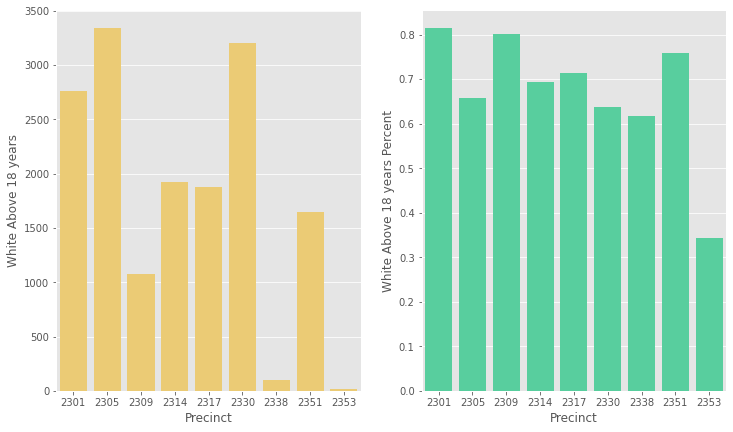

In [41]:
fig, ax = plt.subplots(1,2, figsize=(12, 7))
sns.barplot(x="Precinct", y="White Above 18 years", data=df, ax=ax[0], color="#FFD461")
sns.barplot(x="Precinct", y="White Above 18 years Percent", ax=ax[1], data=df, color="#44E2A1");

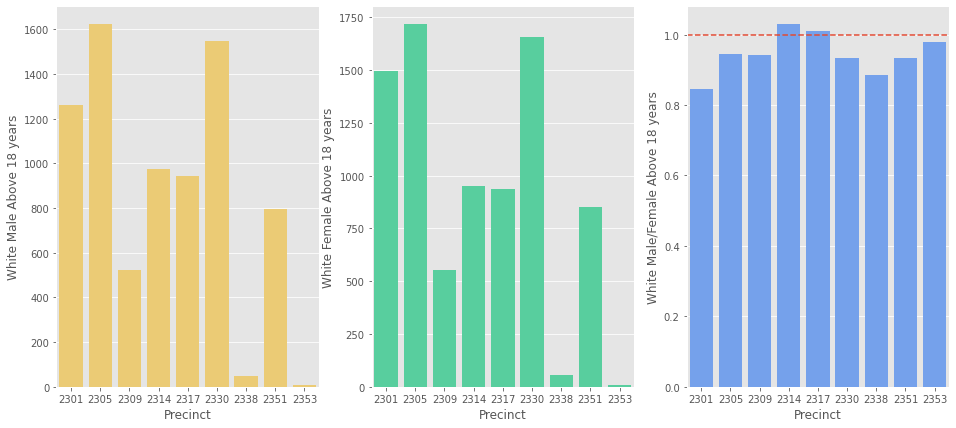

In [42]:
df["White Male/Female Above 18 years"] = df['White Male Above 18 years']/df['White Female Above 18 years']
fig, ax = plt.subplots(1,3, figsize=(16, 7))
sns.barplot(x="Precinct", y="White Male Above 18 years", data=df, ax=ax[0], color="#FFD461")
sns.barplot(x="Precinct", y="White Female Above 18 years", ax=ax[1], data=df, color="#44E2A1")
sns.barplot(x="Precinct", y="White Male/Female Above 18 years", ax=ax[2], data=df, color="#619CFF")
ax[2].axhline(1.0, ls="--");

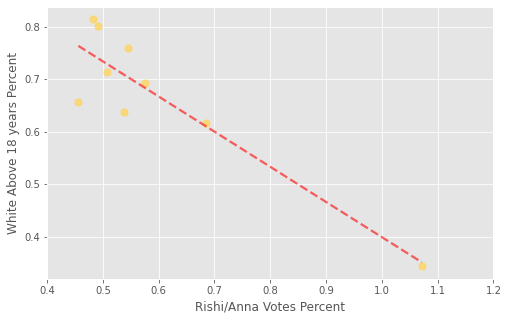

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="White Above 18 years Percent",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"#FFD461"}, 
                line_kws={"color":"red", "ls":"--", "alpha": 0.6})
ax.set(xlim=(0.4, 1.2));

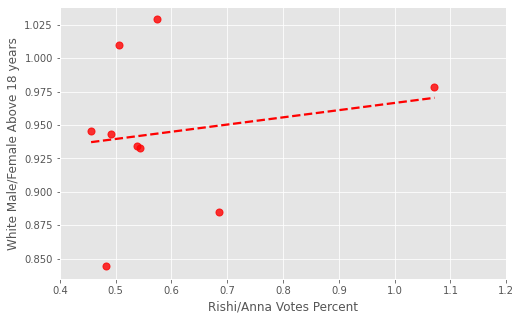

In [71]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="White Male/Female Above 18 years",data=df, ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

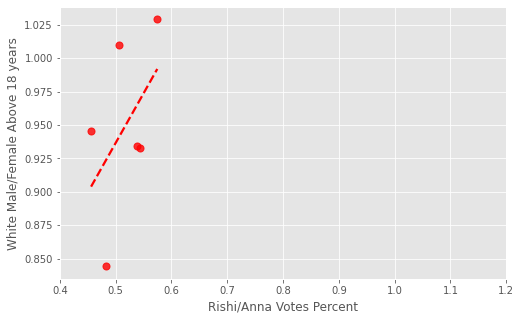

In [76]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x="Rishi/Anna Votes Percent", y="White Male/Female Above 18 years",data=df[df['Total']>2000], ax=ax, ci=False, 
            scatter_kws={"s":50, 'color':"red"}, line_kws={"color":"red", "ls":"--"})
ax.set(xlim=(0.4, 1.2));

# Modeling

Features:
- Registered Voters
- Male Percent
- Male/Female Above 18 years Precent
- Age Distribution
- White Above 18 years by Precinct

Target: Rishi/Anna Votes Percent

In [139]:
selected_col = ['Registered Voters', 'Male Percent', 'Male/Female Above 18 years Percent', "White Above 18 years Percent",
                'Total Below 18 years', 'Total 18 to 24 years', 'Total 25 to 39 years', 'Total 40 to 54 years', 
                'Total 55 to 74 years', 'Total Above 75 years', ]
X = df[selected_col]
X

,Registered Voters,Male Percent,Male/Female Above 18 years Percent,White Above 18 years Percent,Total Below 18 years,Total 18 to 24 years,Total 25 to 39 years,Total 40 to 54 years,Total 55 to 74 years,Total Above 75 years
0,3636,0.895242,0.887465,0.813754,1153.000000,105.000000,298.000000,1100.000000,1227.000000,658.000000
1,4846,1.009243,1.002366,0.657345,1878.000000,189.000000,1066.000000,1783.000000,1443.000000,597.000000
2,1231,1.005936,0.901348,0.801418,519.000000,61.500000,192.000000,514.000000,397.000000,175.000000
3,2828,0.920092,0.942368,0.692861,980.000000,242.500000,372.000000,919.000000,956.000000,291.000000
4,2707,0.776904,0.834377,0.712822,980.000000,88.000000,368.000000,999.000000,838.000000,343.000000
5,4245,0.885665,0.910993,0.637540,1540.000000,380.000000,847.000000,1270.000000,1902.000000,625.000000
6,167,1.002020,0.818627,0.617251,56.041779,0.000000,42.537736,58.967655,45.913747,19.580863
7,2398,1.056617,0.923759,0.758986,736.000000,104.000000,260.000000,766.000000,680.000000,360.000000
8,43,0.702703,0.875000,0.343396,21.743396,1.568553,7.193711,23.149686,9.573585,1.514465


In [140]:
y = df['Rishi/Anna Votes Percent']

In [152]:
# Model Selection
def select_model(model):
    err = 0
    for i in range(8):
        # Split Train/Test
        X_train = X.drop(i)
        X_test = pd.DataFrame(X.loc[i]).T
        
        y_train = y.drop(i)
        y_test = y[i]
        
        # Train the Model
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        err += (y_test - prediction) ** 2
    return [type(model).__name__, rf_reg.get_params(), err]



from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from xgboost import XGBRegressor
model_df = []
models = [
    # Random Forest
    RandomForestRegressor(),
    
    # Linear Model
    LinearRegression(),
    Lasso(),
    Ridge(),
    SGDRegressor(),
    
    # Xgboost
    XGBRegressor()
]
for model in models:
    result = select_model(model)
    model_df.append(result)

pd.DataFrame(model_df, columns=["Model Name", "Model Parameters", "Average MSE"])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3827742389469506e-05, tolerance: 2.8251838840559125e-05
  model = cd_fast.enet_coordinate_descent(


,Model Name,Model Parameters,Average MSE
0,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[0.03964317676251587]
1,LinearRegression,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[581.3757295755161]
2,Lasso,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[0.2238582369602242]
3,Ridge,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[457.8785322652767]
4,SGDRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[5.84824925520702e+33]
5,XGBRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",[0.20135786]


In [156]:
rf = RandomForestRegressor()
rf.fit(X, y)
pd.DataFrame({'Feature': X.columns, 'Importance':rf.feature_importances_}).sort_values("Importance", ascending=False)

,Feature,Importance
3,White Above 18 years Percent,0.126276
4,Total Below 18 years,0.117794
8,Total 55 to 74 years,0.116338
5,Total 18 to 24 years,0.116225
0,Registered Voters,0.100824
9,Total Above 75 years,0.092687
2,Male/Female Above 18 years Percent,0.090807
6,Total 25 to 39 years,0.085613
7,Total 40 to 54 years,0.079326
1,Male Percent,0.074110
